Korijen srednje kvadratne greske je :56.15091555984476


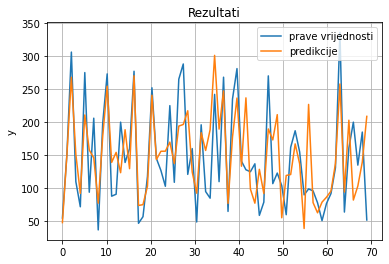

In [34]:
# predikcija lokalno ponderisanom regresijom
data_test = pd.read_csv('/content/data_test.csv',header=None)
data_test = data_test.values[1:,1:]
y_test = data_test[:,5]
y_pred = model(data_test[:,0:5])

x_osa = np.linspace(0,len(y_pred),len(y_pred))
plt.plot(x_osa,y_test)
plt.plot(x_osa,y_pred)
plt.grid()
plt.title('Rezultati')
plt.legend(['prave vrijednosti','predikcije'])
plt.ylabel('y')

srednja_kvadratna_greska = np.dot((y_pred-y_test).T,(y_pred-y_test))/len(y_pred)
print('Korijen srednje kvadratne greske je :'+str(srednja_kvadratna_greska**0.5))

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# podjela na testirajuci  i obucavajuci skup
data = pd.read_csv('/content/drive/MyDrive/data.csv', header=None)
data = data.values
# standardizacija podataka
for i in range(0,5):
  data_mean = np.mean(data[:,i])
  data_var = np.dot((data[:,i]-data_mean).T,(data[:,i]-data_mean))/len(data)
  data[:,i] = (data[:,i]-data_mean)/(data_var**0.5)
data_train, data_test = train_test_split(data,test_size=0.2,shuffle=True)

data_train = pd.DataFrame(data_train)
data_test = pd.DataFrame(data_test)  
data_train.to_csv("data_train.csv")
data_test.to_csv("data_test.csv")

In [2]:
# validacija za odredjivanje hiper parametra
N = 1 # broj tacaka u kojima se racuna
k = 7 # broj foldova
err = np.zeros([N,k])
Tau = np.linspace(4,8,N)

data = pd.read_csv('/content/data_train.csv', header=None)
data = data.values[1:,1:]

# standardizacija podataka
for i in range(0,5):
  data_mean = np.mean(data[:,i])
  data_var = np.dot((data[:,i]-data_mean).T,(data[:,i]-data_mean))/len(data)
  data[:,i] = (data[:,i]-data_mean)/(data_var**0.5)

# dopunjavanje x jedinicama
data = np.append(np.ones(len(data)).reshape(len(data),1),data,axis=1)
foldovi = np.reshape(data,[k,round(len(data)/k),7])

for i in range(0,N): # petlja po tau
  tau = Tau[i]
  for j in range(0,k): # petlja po foldovima
    prazan_obucavajuci = 1
    for l in range(0,k): # raspodjela foldova u testirajuci i obucavajuce
      if j==l:
        testirajuci = foldovi [j,:,:]
      else:
        if prazan_obucavajuci==1:
          obucavajuci = foldovi[l,:,:]
          prazan_obucavajuci = 0
        else:
          obucavajuci = np.concatenate((obucavajuci,foldovi[l,:,:]),axis=0)

    y_pred = np.zeros([1,len(testirajuci)])
    theta =np.zeros([1,6])

    # za svako x iz testirajuceg se odredjuju optimalni parametri modela
    for l in range(0,testirajuci.shape[0]):
      X = testirajuci[l,0:6]
      # odredjivanje tezina
      w = np.mat(np.eye(obucavajuci.shape[0])) 
      for m in range(len(w)): 
          w[m, m] = np.exp(np.dot((obucavajuci[m,0:6]-X),(obucavajuci[i,0:6]-X).T)/(-2)/tau/tau) 

      # odredjivanje modela
      theta = (np.linalg.pinv(obucavajuci[:,0:6].T*w*obucavajuci[:,0:6])*obucavajuci[:,0:6].T*w*(obucavajuci[:,6].reshape(len(obucavajuci),1))).T

      # odredjivanje izlaza
      y_pred[0,l] = np.dot(theta,X) 

    err[i,j] = (np.dot((y_pred-testirajuci[:,6]),(y_pred-testirajuci[:,6]).T)/y_pred.shape[1])**0.5
  
err_mean = err.mean(1)
err_std = err.std(1)

Text(0, 0.5, 'err')

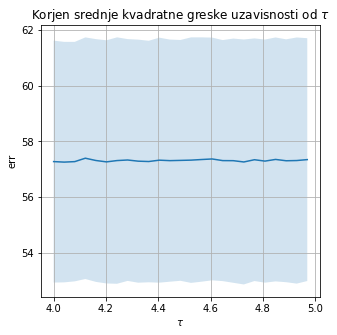

In [ ]:
rcParams['figure.figsize'] = 5, 5
m = 0
n = 25
fig, ax = plt.subplots()
plt.plot(Tau[m:n],err_mean[m:n])
ax.fill_between(Tau[m:n],err_mean[m:n]-err_std[m:n],err_mean[m:n]+err_std[m:n],alpha=0.2)
plt.grid()
plt.title('Korjen srednje kvadratne greske uzavisnosti od $\u03C4$') 
plt.xlabel('$\u03C4$')
plt.ylabel('err')

In [16]:
def model(data):
  tau = 10 # odredjeno na osnovu krosvalidacije
  # prediktori i ciljna promjenjiva
  x = np.append(np.ones(len(data)).reshape(len(data),1),data,axis=1)
  y_pred = np.zeros([len(data),1])

  # obucavajuci skup
  data_train = pd.read_csv('/content/data_train.csv',header=None)
  data_train = data_train.values[1:,1:]
  x_train = np.append(np.ones(len(data_train)).reshape(len(data_train),1),data_train[:,0:5],axis=1)
  y_train = data_train[:,5]

  # odredjivanje modela
  y_train = np.matrix(y_train)
  theta =np.zeros([1,6])

  # za svako x se odredjuju optimalni parametri modela
  for k in range(0,x.shape[0]):
    X = x[k,:]
    # odredjivanje tezina
    w = np.mat(np.eye(x_train.shape[0])) 
    for i in range(len(w)): 
        w[i, i] = np.exp(np.dot((x_train[i,:]-X),(x_train[i,:]-X).T)/(-2)/tau/tau) 

    # odredjivanje modela
    theta = (np.linalg.pinv(x_train.T*w*x_train)*x_train.T*w*(y_train.T)).T

    # odredjivanje izlaza
    y_pred[k] = np.dot(theta,X) 

  return np.ravel(y_pred) 

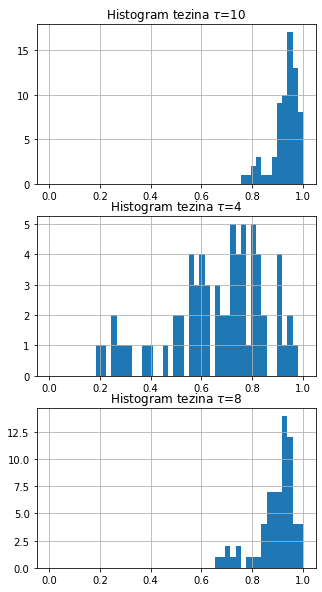

In [ ]:
# prikaz kako se mijenjaju tezine u zavisnosti od tau
from pylab import rcParams
k=50
data = data_test[:,0:5]
x = np.append(np.ones(len(data)).reshape(len(data),1),data,axis=1)
X = x[k,:]
data_train = pd.read_csv('/content/data_train.csv',header=None)
data_train = data_train.values[1:,1:]
x_train = np.append(np.ones(len(data_train)).reshape(len(data_train),1),data_train[:,0:5],axis=1)
y_train = data_train[:,5]
w = np.zeros([1,len(data)]) 
a=np.linspace(0,1,50)
tautau = [10,4,8]
for j in range(0,3):
  tau = tautau[j]
  for i in range(0,w.shape[1]): 
      w[0,i] = np.exp(np.dot((x_train[i,:]-X),(x_train[i,:]-X).T)/(-2)/tau/tau) 

  rcParams['figure.figsize'] = 5, 10
  plt.subplot(3,1,j+1)
  plt.hist(w[0,:],bins=a)
  plt.grid()
  plt.title('Histogram tezina $\u03C4$='+str(tau))